#Homework 2: Drug Side Effects

*In the second homework, you are going to work with SIDER side effects dataset.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw1`</font>.

2. Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

3. Do not delete your outputs. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed on the notebook.

4. When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In this homework, you will work on a dataset from [SIDER Side Effect Resource](http://sideeffects.embl.de/). SIDER contains information on marketed drugs and their recorded adverse drug reactions (ADR).

For this homework, you will use the provided file `meddra_all_se.csv`. This is a modified and simplified version of the original dataset, which contains possible side effects of different drugs.
<!-- This is not the original data file, we modified and eliminated some parts to make your work easier. -->

As listed in their prospectives, drugs can cause some side effects besides their healing properties. This dataset simply contains entries of drugs and their potential side effects.

In the dataset, each row has 4 attribute values separated with `,`. These attributes are described in the list below with their respective order in the dataset.


  1.   **STITCH compound id:** Refers to ID of a particular drug 

  2.   **UMLS concept id:** Unified Medical Language System ID

  3.   **UMLS concept id for MedDRA term** 

  4.   **Side effect name:** Contains the possible side effect entry.

**You will consider the STITCH compound id as the id of a particular drug. Therefore, rows with the same STITCH compound id refer to possible side effects of the same particular drug.**

A snapshot from the dataset containing three sample rows is also provided below.
```
...
CID100000085,CID000010917,C0015230,Rash
CID100000085,CID000010917,C0015397,Eye disorder
CID100000085,CID000010917,C0015967,Body temperature increased

...
```

*Do not forget to add the shared `meddra_all_se.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*

**!!!You are not allowed to use `pandas` in this homework**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


## Q1: Descriptive Statistics of the Dataset

In this question, your task is to gather some descriptive information about the dataset. To do this, first read the provided dataset and store it in a 2 dimensional numpy array. Then, print the listed descriptive statistics about the dataset.

*   Shape of the dataset, i.e. number of rows and columns
*   Number of unique drugs 
*   Number of unique side effects

In [ ]:
# your code
templist= []
datarr=[]
count = 0
with open("./drive/My Drive/meddra_all_se.csv", "rt") as ogfile:
  for line in ogfile:
    for word in line.split(","):
      
      templist.append(word)
      count=count+1
      if (count==4):
        datarr.append(list(templist))
        count= 0
        templist.clear()
nparray= np.asarray(datarr)
print(nparray.shape) ##q1 shape


#creating an "only cid" list
cidlist = []
for cid in np.nditer(nparray[:, ::4]):
  cidlist.append(cid)

cidnp = np.asarray(cidlist)

unq = np.unique(cidnp)

print(len(unq)) #num of unique drugs

#creating an "only side effects" list
selist = []
searray = nparray.flatten(order='C')
selist =searray[3::4]
senp= np.asarray(selist)

unq2= np.unique(senp)
print(len(unq2)) #num of unique side effects







(91281, 4)
953
5064


## Q2: Side Effects of Drugs

### Part A 

As explained above, side effect entries in the dataset correspond to possible side effects of different drugs.

In this part, your goal is to find the drug which has the most side effects in the dataset. <!-- Print the `drug id` *(STITCH compound id)* of that drug and `number of its indications`. --> Print the `drug id` *(STITCH compound id)* of that drug and print the number of possible side effects (indications) it has.

Print your results in the following format.

``` py
drug id: CID100002771
number of side effects: 766
```




In [ ]:
# your code


unique,pos = np.unique(cidnp,return_inverse=True) 
counts = np.bincount(pos)                     
maxpos = counts.argmax()                      

print("drug id: ",unique[maxpos])
print("number of side effects: ",counts[maxpos])






drug id:  CID100002771
number of side effects:  766


### Part B 

Now, find the number of side effects for all drugs and display its distribution as an histogram.

An exemplary figure can be observed below.

![](https://i.ibb.co/7zPSnkR/hist.jpg)



[13  2  1 ...  3  1  1]


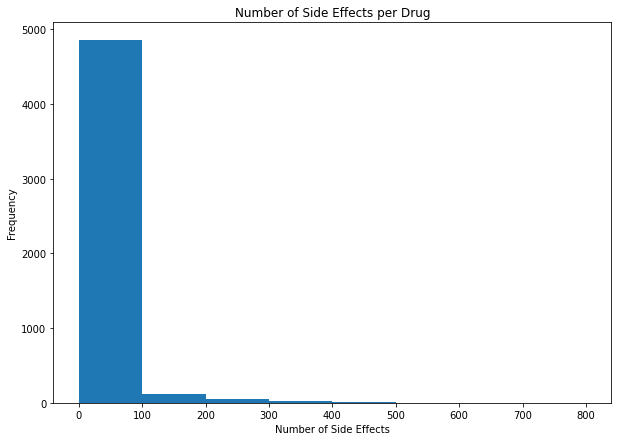

In [ ]:
# your code

uniqueValues, occurCount = np.unique(senp, return_counts=True)
#print("Unique Values : " , uniqueValues)
#print("Occurrence Count : ", occurCount)

fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(occurCount, bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]) 

print(occurCount)
plt.xlabel("Number of Side Effects")
plt.ylabel("Frequency")
plt.title("Number of Side Effects per Drug")
# Show plot 
plt.show() 











## Q3: The Most Frequent Side Effects

Here, you are going to analyze side effects that can be more commonly caused by drugs. 

Since we have a dataset of drugs and their potential side effects, one of the first question that comes to mind is to see the most common side effects of these drugs.

*   Plot a `bar chart` to show most frequent 15 side effects of the dataset.

![](https://i.ibb.co/Y8nQr3p/barh.jpg)

*You can choose to make the bar chart with a different style, but the bars should look like the chart above.* 


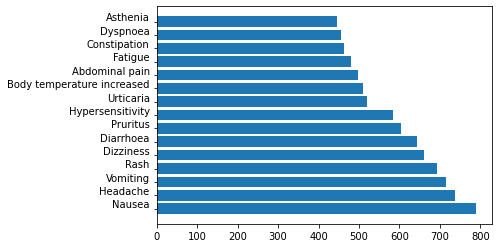

In [ ]:
# your code

from collections import Counter
from itertools import repeat, chain
list_with_multiples=list(chain.from_iterable(repeat(i, c) for i,c in Counter(senp).most_common()))
unique_names = []
frequency = []
for a in list_with_multiples:
    if len(unique_names)<15:
      if a not in unique_names:
          unique_names.append(a)
    else:
      break

for name in unique_names:
  no = list_with_multiples.count(name)
  frequency.append(no)

y_pos = np.arange(len(unique_names))
 
# Create horizontal bars
plt.barh(y_pos, frequency)
 
# Create names on the y-axis
plt.yticks(y_pos, unique_names)
 
# Show graphic
plt.show()
 

## Q4: Conditional Probability

In Probability Theory, conditional probability is a measure of the probability of an event occurring, given that another event has already occurred. The formula for the conditional probability is shared below.

```
P(B|A) = P(A and B) / P(A)
```

As also suggested by our dataset, drugs can have multiple side effects. With the conditional probability, we can study the chances of a particular side effect with a given presence of another one.

So, the following question can be answered with our dataset. 

**If a drug has `Headache` side effect, what is the probability it also has `Vomiting` side effect?**

Please calculate this conditional probability from the dataset and report the resulting probability score.

In [ ]:
from collections import Counter

MyList = list(cidnp)
a = dict(Counter(MyList))
number_of_oc = list(a.values())         

counter_head = 0
counter_vh = 0
index = 0

for x in number_of_oc:
  boo1= False
  boo2 = False
  for y in range(x):
    side_ef = senp[index]
    index = index + 1
    if (side_ef == "Headache\n"):
      counter_head = counter_head +1
      boo1 = True
    if (side_ef == "Vomiting\n"):
      boo2 = True
  
    
    if boo2 and boo1 and side_ef=="Vomiting\n":
        counter_vh = counter_vh+1

print( counter_vh / counter_head)










  



0.8331071913161465
